It's been almost a year since Hurricane Maria slammed into Puerto Rico. There are still people without a safe roof over their heads and electricity in their houses. However, islanders will always find the beach to be the place where they can let go of all worries and enjoy quality time. Beaches in Puerto Rico are a main attraction for foreigners and locals since they are warm all year round. Yet one cannot forget that the environment impacts of a category four hurricane does not disappear in a short period of time. On the island all the rivers went out of their channel and dragged debris and dead animals for months. This project intends to answer the questions of many locals and visitors have:

Are Puerto Rican beaches in a good state after Maria or the data says something different?
What’s the beach water quality of the most visited beaches?
Has the hurricane have a life long impact on beach water quality?

Some Beaches included in water monitoring system in Puerto Rico
• Balneario El Escambrón - San Juan
• Balneario de Carolina
• Balneario Monserrate - Luquillo·
• Playa Flamenco - Culebra
• Balneario Punta Santiago - Humacao
• Balneario Seven Seas - Fajardo
• Balneario Punta Aguilarte - Arroyo
• Balneario de Patillas
• Playa Buyé - Cabo Rojo
• Balneario de Rincón - Rincón
• Balneario Caña Gorda - Guánica
• Balneario Boquerón - Cabo Rojo
• Playa Combate - Cabo Rojo
• Balneario Puerto Nuevo - Vega Baja
• Playa Santa - Guánica
• Balneario de Añasco - Añasco
• Playa Moja Casabe - Cabo Rojo
• Balneario Crash Boat - Aguadilla
• Balneario Cerro Gordo -Vega Alta
• Balneario Sardinera - Dorado
• Balneario Punta Salinas - Toa Baja·
• Balneario Pico de Piedra - Aguada
• Balneario Sun Bay - Vieques

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['chartreuse','mediumseagreen','mediumaquamarine','mediumturquoise','cadetblue','skyblue','teal',
                                        'mediumspringgreen','seagreen']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [3]:
playas=pd.read_csv('Monitoreo de Playas 2018')

In [4]:
playas.head()


,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
0,2017-11-27,RW-18,Balneario Manuel “Nolo” Morales or Sardinera,18.474694,-66.280892,Route 1: Dorado - Loíza,Routine,10,26.8,8.02,NaN
1,2017-11-27,RW-19,Balneario Punta Salinas,18.471658,-66.185994,Route 1: Dorado - Loíza,Routine,41,27.5,7.95,NaN
2,2017-11-27,RW-20A,Balneario El Escambrón,18.467236,-66.089958,Route 1: Dorado - Loíza,Routine,10,28.5,7.99,NaN
3,2017-11-27,RW-25A,Playa Sixto Escobar,18.466731,-66.086667,Route 1: Dorado - Loíza,Routine,10,28.2,8.02,NaN
4,2017-11-27,RW-26,Playita del Condado,18.461131,-66.082408,Route 1: Dorado - Loíza,Routine,10,28.5,8.11/8.12,NaN


In [5]:
playas.shape

(848, 11)

In [6]:
playas.columns

Index(['Date', 'Beach ID', 'Beach Name', 'Latitude', 'Longitude',
       'Sampling Route', 'Sampling Type', 'Enterococcus\r\n (colonies/100 mL)',
       'Temperature\r\n(°C)', 'pH ', 'Observations'],
      dtype='object')

In [7]:
playas['Date']=playas['Date'].str.extract(r'(\d\d\d\d-\d\d-\d\d)')

In [41]:
playas2=pd.read_csv("Monitoreo 2016 y 2017.csv")
playas2.head()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
0,2016-10-03,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.287997,-67.193922,Route 5: Añasco - Aguadilla,Routine,146,29.00,8.14,NaN
1,2016-10-03,RW-5,Balneario de Rincón,18.340925,-67.256006,Route 5: Añasco - Aguadilla,Routine,275,29.10,8.16,NaN
2,2016-10-03,RW-22,Pico de Piedra,18.384364,-67.212989,Route 5: Añasco - Aguadilla,Routine,10,28.80,8.18,NaN
3,2016-10-03,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,10,28.90,8.12/8.12,NaN
4,2016-10-03,RW-37,Villa Lamela,18.064533,-67.197528,Route 4: Cabo Rojo,Routine,20,28.50,8.16,NaN


In [40]:
playas3=pd.read_csv("Monitoreo 2015 y 2016.csv")
playas3.tail()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
1425,2016-09-27,RW-4,Balneario Punta Santiago,18.1584139,-65.7551861,Route 2: Arroyo - Luquillo,Routine,10,30.60,8.15,NaN
1426,2016-09-27,RW-31,Tropical Beach,18.1869278,-65.7259667,Route 2: Arroyo - Luquillo,Routine,116,31.20,8.15/8.15,NaN
1427,2016-09-27,RW-2,Balneario Seven Seas,18.3692667,-65.6360722,Route 2: Arroyo - Luquillo,Routine,10,31.40,8.11,NaN
1428,2016-09-27,RW-32,Playa Azul,18.3818667,-65.7184583,Route 2: Arroyo - Luquillo,Routine,10,29.70,8.18,NaN
1429,2016-09-27,RW-1A,Balneario La Monserrate,18.3855917,-65.7294722,Route 2: Arroyo - Luquillo,Routine,10,29.70,8.16,NaN


In [10]:
playasdePuertoRico=pd.concat([playas2,playas],sort=False, ignore_index=True)
playasdePuertoRico.head()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
0,2016-10-03,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.287997,-67.193922,Route 5: Añasco - Aguadilla,Routine,146,29.00,8.14,NaN
1,2016-10-03,RW-5,Balneario de Rincón,18.340925,-67.256006,Route 5: Añasco - Aguadilla,Routine,275,29.10,8.16,NaN
2,2016-10-03,RW-22,Pico de Piedra,18.384364,-67.212989,Route 5: Añasco - Aguadilla,Routine,10,28.80,8.18,NaN
3,2016-10-03,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,10,28.90,8.12/8.12,NaN
4,2016-10-03,RW-37,Villa Lamela,18.064533,-67.197528,Route 4: Cabo Rojo,Routine,20,28.50,8.16,NaN


In [11]:
playasdePuertoRico=pd.concat([playas3,playasdePuertoRico],sort=False, ignore_index=True)
playasdePuertoRico.head()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
0,2015-01-07,RW-18,Balneario Manuel “Nolo” Morales or Sardinera,Route 1: Dorado - Loíza,Routine,240,24,23.90,8.16/8.15,The information provided is preliminary .,NaN
1,2015-01-07,RW-19,Balneario Punta Salinas,Route 1: Dorado - Loíza,Routine,8,1,25.00,8.13,The information provided is preliminary .,NaN
2,2015-01-07,RW-20A,Balneario El Escambrón,Route 1: Dorado - Loíza,Routine,1,1,24.60,8.08,The information provided is preliminary .,NaN
3,2015-01-07,RW-21C,Balneario de Carolina,Route 1: Dorado - Loíza,Routine,1,1,25.30,8.12,The information provided is preliminary .,NaN
4,2015-01-07,RW-25A,Playa Sixto Escobar,Route 1: Dorado - Loíza,Routine,240,24,24.50,8.03,The information provided is preliminary .,NaN


In [12]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    #print(playasdePuertoRico)

In [13]:
playasdePuertoRico.to_csv('Toda Playa', sep='\t', encoding='utf-8')

In [14]:
playasdePuertoRico['Beach Name'].value_counts()

Tropical Beach                                     124
Muelle de Arecibo                                  112
Playa Guayanés                                     103
Balneario de Patillas                              101
Balneario de Rincón                                 94
Pico de Piedra                                      94
Balneario Punta Guilarte                            93
Playa Moja Casabe                                   93
Playa Buyé                                          92
Balneario de Puerto Nuevo                           92
Balneario Punta Santiago                            92
Balneario de Añasco or Balneario Tres Hermanos      91
Villa Lamela                                        89
Balneario Manuel “Nolo” Morales or Sardinera        89
Balneario Punta Salinas                             87
Playa Santa                                         87
Balneario Seven Seas                                87
Vacía Talega                                        87
Balneario 

In [15]:
import re

In [16]:
playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)']=playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'].fillna(0)

In [17]:
playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)']=playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'].str.extract(r'<?(.*)')

In [18]:
playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'].describe()

count     3174
unique     348
top         10
freq      1281
Name: Enterococcus\r\n (colonies/100 mL), dtype: object

In [19]:
playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)']=pd.to_numeric(playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'], errors='coerce')

In [20]:
# Under the Puerto Rican Enviromental Authorities, Enterococci concentrations  for  a  single  sample  
#shall  not  exceed  70 Colony  Forming  Units  (CFUs)  per 100  mL 
#El parámetro de enterococos excede el "Beach Action Value" aplicable cuando:
#El resultado del análisis bacteriológico es mayor de 70 colonias por cada 100 mililitros de agua (colonias /100mL).

playas_sucias = playasdePuertoRico[playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'] > 70]
playas_sucias.shape

(511, 11)

In [21]:
playas_sucias['Date']=pd.to_datetime(playas_sucias['Date'],format='%Y-%m-%d')

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
playas_sucias.columns

Index(['Date', 'Beach ID', 'Beach Name', 'Latitude', 'Longitude',
       'Sampling Route', 'Sampling Type', 'Enterococcus\r\n (colonies/100 mL)',
       'Temperature\r\n(°C)', 'pH ', 'Observations'],
      dtype='object')

In [23]:
playas_sucias['Year'] = playas_sucias['Date'].dt.year
playas_sucias['Month'] = playas_sucias['Date'].dt.month

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
playas_sucias=playas_sucias.rename(columns={'Enterococcus\r\n (colonies/100 mL)':'Enterococcus_colonies'})
playas_sucias

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus_colonies,Temperature (°C),pH,Observations,Year,Month
387,2015-05-04,RW-10,Playa Santa,17.9377111,-66.9551972,Route 3: Lajas - Salinas,Routine,355.0,28.50,8.1,NaN,2015,5
411,2015-05-05,RW-31,Tropical Beach,18.1869278,-65.7259667,Route 2: Arroyo - Luquillo,Routine,75.0,29.20,7.88/7.88,NaN,2015,5
419,2015-05-11,RW-31,Tropical Beach,18.1869278,-65.7259667,Route 2: Arroyo - Luquillo,Re-sampling,473.0,27.30,Bacteriological Re-sampling,NaN,2015,5
420,2015-05-11,RW-10,Playa Santa,17.9377111,-66.9551972,Route 3: Lajas - Salinas,Re-sampling,275.0,26.50,Bacteriological Re-sampling,NaN,2015,5
443,2015-05-19,RW-28,Playa El Alambique,18.4440917,-66.0221500,Route 1: Dorado - Loíza,Routine,313.0,28.90,8.27,NaN,2015,5
446,2015-05-19,RW-38,Muelle de Arecibo,18.4792583,-66.7004667,Route: 6: Arecibo – Vega Alta,Routine,86.0,26.90,8.15,NaN,2015,5
470,2015-06-01,RW-10,Playa Santa,17.9377111,-66.9551972,Route 3: Lajas - Salinas,Routine,86.0,29.70,8.03,NaN,2015,6
475,2015-06-01,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.2879972,-67.1939222,Route 5: Añasco - Aguadilla,Routine,158.0,27.30,8.22,NaN,2015,6
476,2015-06-01,RW-5,Balneario de Rincón,18.3409250,-67.2560056,Route 5: Añasco - Aguadilla,Routine,571.0,27.50,8.15,NaN,2015,6
477,2015-06-01,RW-22,Pico de Piedra,18.3843639,-67.2129889,Route 5: Añasco - Aguadilla,Routine,4611.0,28.20,8.1,NaN,2015,6


#colors= ['mediumaquamarine','mediumturquoise','cadetblue','skyblue','teal',
                                        #'mediumspringgreen','seagreen']
data= playas_sucias.groupby('Year').Enterococcus_colonies.max()
ax = data.plot(kind='scatter',x='Enterococcus_colonies',y='Year')
plt.tight_layout()
#plt.savefig('Pollutionperyear.pdf',transparent=True)
plt.show()

In [25]:
#Water conditions after the hurricane. I must point out that the JCA did not take samples until Nov 27. 
#The hurricane hit on Sept 20th. 
Maria_year= playas_sucias[(playas_sucias['Year']==2017) & (playas_sucias['Month']>=11)]

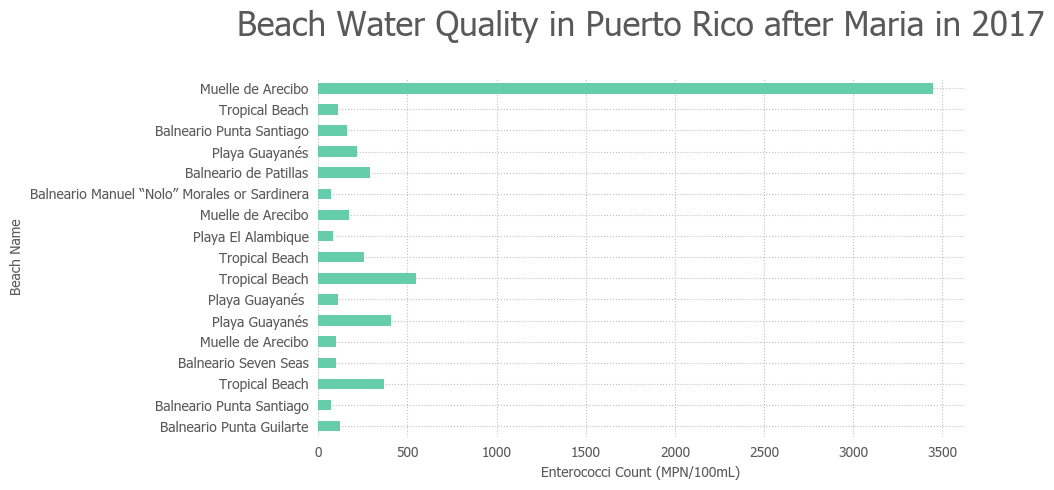

In [26]:
df1= Maria_year.sort_values(by='Month',ascending=False).head(20)
ax= df1.plot(kind='barh', x='Beach Name', y='Enterococcus_colonies', figsize=(10,5),legend=False,rot=0,color='mediumaquamarine')
ax.set_title("Beach Water Quality in Puerto Rico after Maria in 2017", pad=30, fontsize=24)
ax.set_xlabel('Enterococci Count (MPN/100mL)')
#plt.gcf().text(0.5, 0.91, "Bacteria samples exceeding Puerto Rico's Environmental Quality Board parameters", ha='center', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('BeachWaterQualityafterMaria.pdf',transparent=True)
plt.show()

In [27]:
playas_sucias.dtypes

Date                     datetime64[ns]
Beach ID                         object
Beach Name                       object
Latitude                         object
Longitude                        object
Sampling Route                   object
Sampling Type                    object
Enterococcus_colonies           float64
Temperature\r\n(°C)              object
pH                               object
Observations                     object
Year                              int64
Month                             int64
dtype: object

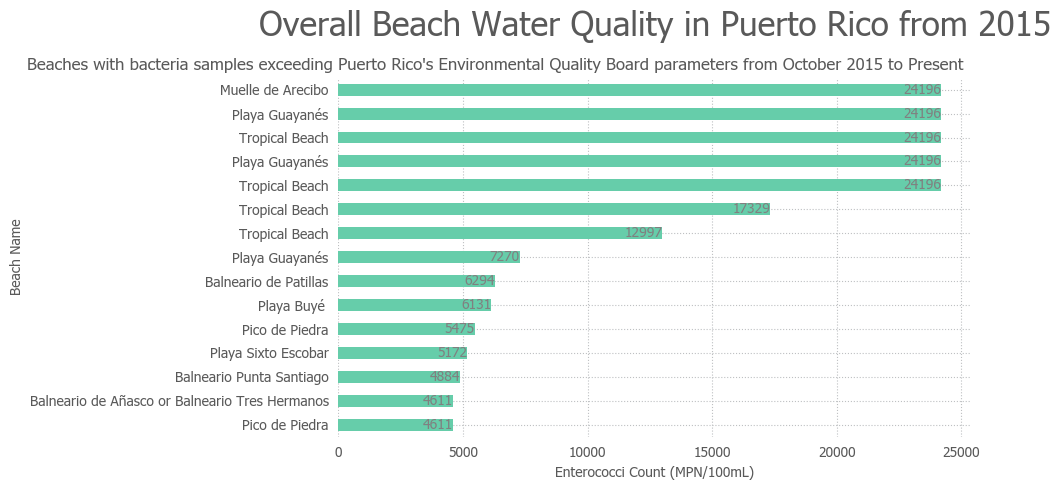

In [52]:
df= playas_sucias.sort_values(by='Enterococcus_colonies',ascending=False).head(15)
ax= df.plot(kind='barh', x='Beach Name', y='Enterococcus_colonies', figsize=(10,5),legend=False,rot=0,color='mediumaquamarine')
ax.set_title("Overall Beach Water Quality in Puerto Rico from 2015", pad=30, fontsize=24)
ax.set_xlabel('Enterococci Count (MPN/100mL)')
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='grey')
plt.gcf().text(0.5, 0.85, "Beaches with bacteria samples exceeding Puerto Rico's Environmental Quality Board parameters from October 2015 to Present", ha='center', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Overall Beach Water Quality in Puerto Rico from 2015.pdf',transparent=True)
plt.show()

In [30]:
playas_sucias.groupby('Beach Name').Enterococcus_colonies.max()

Beach Name
Balneario Cerro Gordo or Javier Calderón Nieves      631.0
Balneario Crash Boat                                 452.0
Balneario El Escambrón                               331.0
Balneario La Monserrate                              327.0
Balneario Manuel “Nolo” Morales or Sardinera        2105.0
Balneario Punta Guilarte                             465.0
Balneario Punta Salinas                              368.0
Balneario Punta Santiago                            4884.0
Balneario Seven Seas                                 828.0
Balneario Sun Bay                                    109.0
Balneario de Añasco or Balneario Tres Hermanos      4611.0
Balneario de Boquerón                                724.0
Balneario de Carolina                                187.0
Balneario de Patillas                               6294.0
Balneario de Puerto Nuevo                           2282.0
Balneario de Rincón                                  813.0
Balneario de Salinas                         

In [31]:
playas_sucias['Year'] = playas_sucias['Date'].dt.year
playas_sucias['Month'] = playas_sucias['Date'].dt.month


In [32]:
import numpy as np
import matplotlib.pyplot as plt

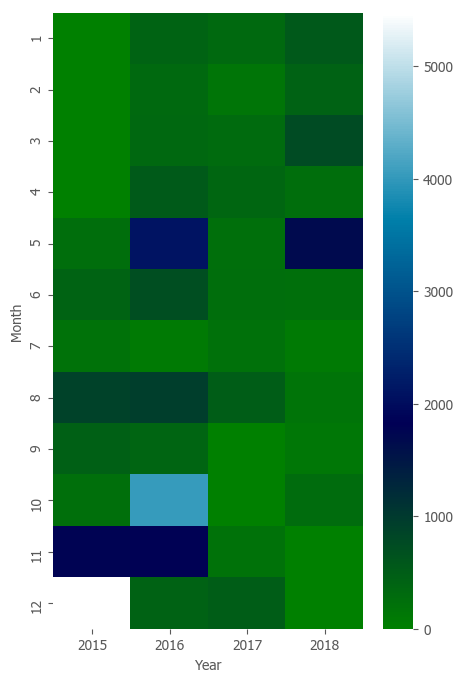

In [33]:
prefinal= playas_sucias.pivot_table(index="Month",columns="Year",values="Enterococcus_colonies", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'ocean'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(prefinal, annot=None, cmap=cmaps)
#plt.tight_layout()
plt.savefig('Dirty_beaches_in_Puerto_Rico_peryear_month.pdf', transparent=True)
plt.show()

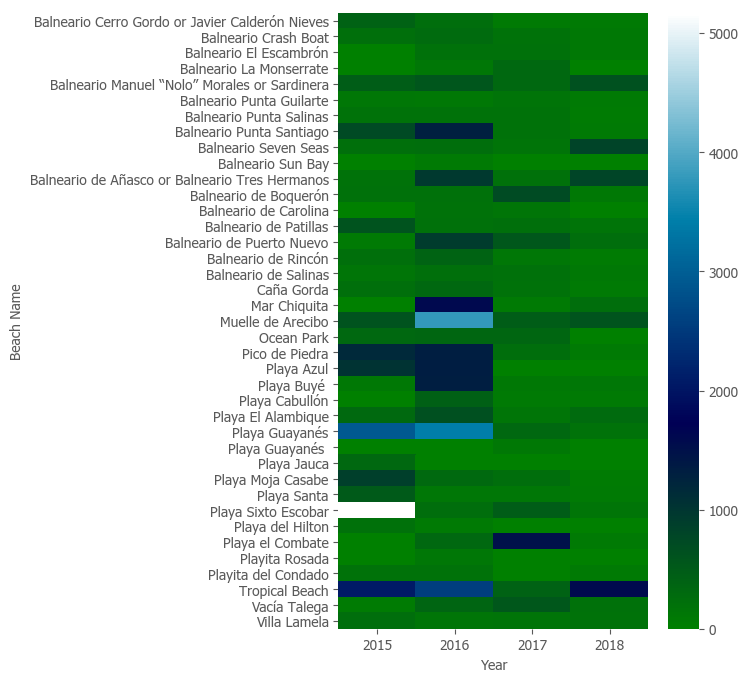

In [34]:
final = playas_sucias.pivot_table(index="Beach Name",columns="Year",values="Enterococcus_colonies", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'ocean'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(final, annot=None, cmap=cmaps)
#plt.tight_layout()
plt.savefig('Dirty_beaches_in_Puerto_Rico.pdf', transparent=True)
plt.show()

In [35]:
df=pd.read_csv('Most visited beaches')
df

,Beach,Town
0,Playa del Condado,San Juan
1,Balneario de Carolina,Carolina
2,Boquerón,Cabo Rojo
3,Buyé,Cabo Rojo
4,El Escambrón,San Juan
5,Jobos,Isabela
6,Balneario Seven Seas,Fajardo
7,Flamenco,Culebra
8,Balneario La Monserrate,Luquillo
9,Ocean Park,San Juan


In [36]:
playas_sucias['Beach Name'].value_counts()

Tropical Beach                                     72
Playa Guayanés                                     46
Muelle de Arecibo                                  45
Balneario de Patillas                              33
Balneario de Añasco or Balneario Tres Hermanos     21
Balneario Manuel “Nolo” Morales or Sardinera       20
Balneario Punta Guilarte                           19
Pico de Piedra                                     18
Balneario Punta Santiago                           18
Playa Moja Casabe                                  17
Balneario de Puerto Nuevo                          16
Vacía Talega                                       14
Balneario de Rincón                                14
Playa Buyé                                         13
Balneario Crash Boat                               13
Playa Santa                                        12
Balneario Punta Salinas                            12
Balneario Cerro Gordo or Javier Calderón Nieves    12
Balneario Seven Seas        

In [37]:
#Mergin two different data frames to seethe conditions of the most visited beaches
most_visited= playas_sucias[playas_sucias['Beach Name'].isin(['Playita del Condado','Balneario de Carolina',
                                                              'Balneario de Boquerón','Playa Buyé','Balneario El Escambrón',
                                                              'Balneario Seven Seas',
                                                              'Balneario La Monserrate',
                                                              'Ocean Park',
                                                              'Playa el Combate','Balneario Crash Boat'])] 
most_visited

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus_colonies,Temperature (°C),pH,Observations,Year,Month
648,2015-07-27,RW-13,Balneario de Boquerón,18.0194417,-67.1722444,Route 4: Cabo Rojo,Routine,211.0,28.00,8.1,NaN,2015,7
700,2015-08-11,RW-2,Balneario Seven Seas,18.3692667,-65.6360722,Route 2: Arroyo - Luquillo,Routine,231.0,30.20,8.24,NaN,2015,8
785,2015-09-08,RW-16,Balneario Crash Boat,18.4576667,-67.1637778,Route 5: Añasco - Aguadilla,Routine,75.0,29.70,8.19/8.19,NaN,2015,9
821,2015-09-22,RW-16,Balneario Crash Boat,18.4576667,-67.1637778,Route 5: Añasco - Aguadilla,Routine,384.0,29.90,8.20/8.19,NaN,2015,9
849,2015-09-23,RW-26,Playita del Condado,18.4611306,-66.0824083,Route 1: Dorado - Loíza,Routine,86.0,30.00,8.15/8.16,NaN,2015,9
918,2015-10-20,RW-26,Playita del Condado,18.4611306,-66.0824083,Route 1: Dorado - Loíza,Routine,293.0,30.50,8.16,NaN,2015,10
1024,2015-12-15,RW-27,Ocean Park,18.4530111,-66.0488806,Route 1: Dorado - Loíza,Routine,327.0,27.20,8.07,NaN,2015,12
1086,2016-02-08,RW-16,Balneario Crash Boat,18.4576667,-67.1637778,Route 5: Añasco - Aguadilla,Routine,146.0,27.30,7.98/7.98,NaN,2016,2
1091,2016-02-09,RW-26,Playita del Condado,18.4611306,-66.0824083,Route 1: Dorado - Loíza,Routine,185.0,27.10,8.06/8.08,NaN,2016,2
1092,2016-02-09,RW-27,Ocean Park,18.4530111,-66.0488806,Route 1: Dorado - Loíza,Routine,355.0,26.80,8.09,NaN,2016,2


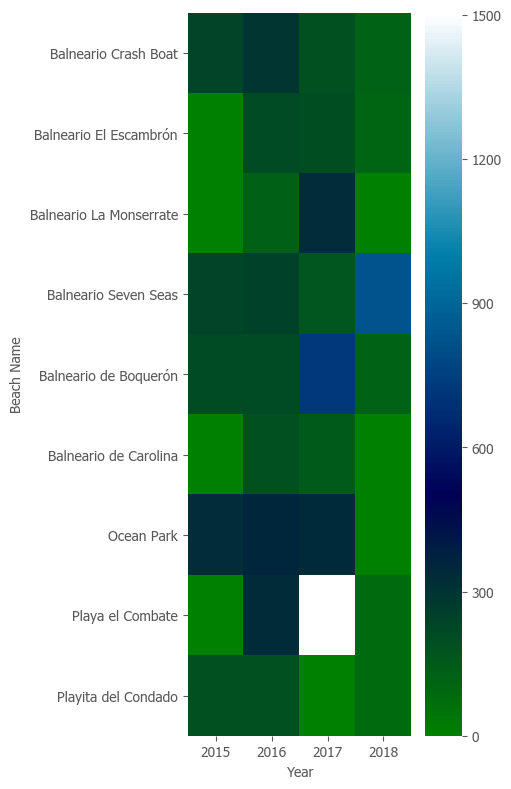

In [38]:
df2 = most_visited.pivot_table(index="Beach Name",columns="Year",values="Enterococcus_colonies", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'ocean'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(df2, annot=None, cmap=cmaps)
plt.tight_layout()
plt.savefig('Dirty most visited beaches per year.pdf', transparent=True)
plt.show()

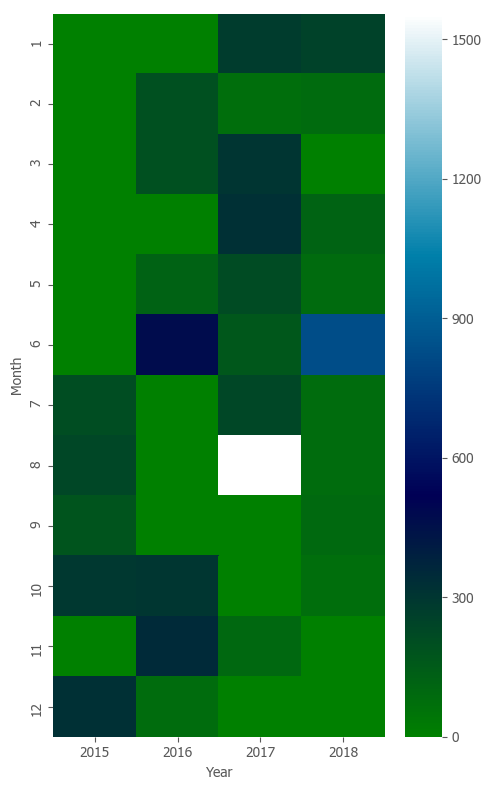

In [39]:
df2 = most_visited.pivot_table(index="Month",columns="Year",values="Enterococcus_colonies", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'ocean'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(df2, annot=None, cmap=cmaps)
plt.tight_layout()
plt.savefig('Dirtymostvisitedbeachesperyearandmonth.pdf', transparent=True)
plt.show()